# fetch some data

In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../helper_functions/')
from datafed_functions import datafed_upload, datafed_download

# transfer ds to nhi-gpu
import pandas as pd
import json # For dealing with metadata
import os # For file level operations
from datafed.CommandLib import API
df_api = API()

ls_resp = df_api.collectionItemsList('c/391027993', count=80)
print(ls_resp)

(item {
  id: "d/458249624"
  title: "plumes_and_images.h5"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 14106459871.0
  notes: 0
}
item {
  id: "d/458249643"
  title: "plumes_fv.h5"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 14124251827.0
  notes: 0
}
item {
  id: "d/458249662"
  title: "plumes_train.h5"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 7052816292.0
  notes: 0
}
item {
  id: "d/391002274"
  title: "YG_002-100mTorr_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 1076404480.0
  notes: 0
}
item {
  id: "d/391034672"
  title: "YG_002-100mTorr(down)_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432.0
  notes: 0
}
item {
  id: "d/391036190"
  title: "YG_002-110mTorr_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432.0
  notes: 0
}
item {
  id: "d/391037378"
  title: "YG_002

In [7]:
datafed_download(file_id='d/403447813', file_path='../datasets/', wait=True)

(task {
  id: "task/480702707"
  type: TT_DATA_GET
  status: TS_FAILED
  client: "u/yig319"
  step: 1
  steps: 3
  msg: "permission denied"
  ct: 1689709686
  ut: 1689709693
  source: "d/403447813"
  dest: "5c48764e-bc4f-11ed-98a1-cf2723108f0c/home/yichen/plume_dynamic_analysis/datasets"
}
, 'TaskDataReply')


# plot

In [2]:
import numpy as np
import sys
sys.path.append('../src/')
from utils import show_h5_dataset_name
from utils import load_h5_examples
from utils import show_images
from PlumeEvaluation import PlumeMetrics
from PlumeEvaluation import plot_metrics
from PlumeEvaluation import plot_metrics_heatmap

def process_func(images):
    '''
    An example process function to preprocess images before conducting following steps

    :param images: images to preprocess
    :type images: np.array
    '''

    images = images[np.random.randint(0, images.shape[0])]
    return images

def plot_metrics_all_steps(ds_path, class_name, ds_name, condition):
    plumes = load_h5_examples(ds_path, class_name, ds_name, process_func, show=False)
    show_images(np.mean(plumes, axis=0), img_per_row=10)

    m = PlumeMetrics(plumes, condition)

    plot_all = m.get_metrics()
    df = m.to_df(plot_all)
    print(df.sample(n=5))

    plot_metrics(df, sort_by='growth_index')
    plot_metrics_heatmap(df, frame_range=(8, 46))
    
    return df

In [6]:
ds_path = '/scratch/yichen/pld_plumes/YG028_Yichen_Guo_06012022.h5'
class_name = 'PLD_Plumes'
show_h5_dataset_name(ds_path, class_name)

<KeysViewHDF5 ['1-SrRuO3', '1-SrRuO3_Pre']>


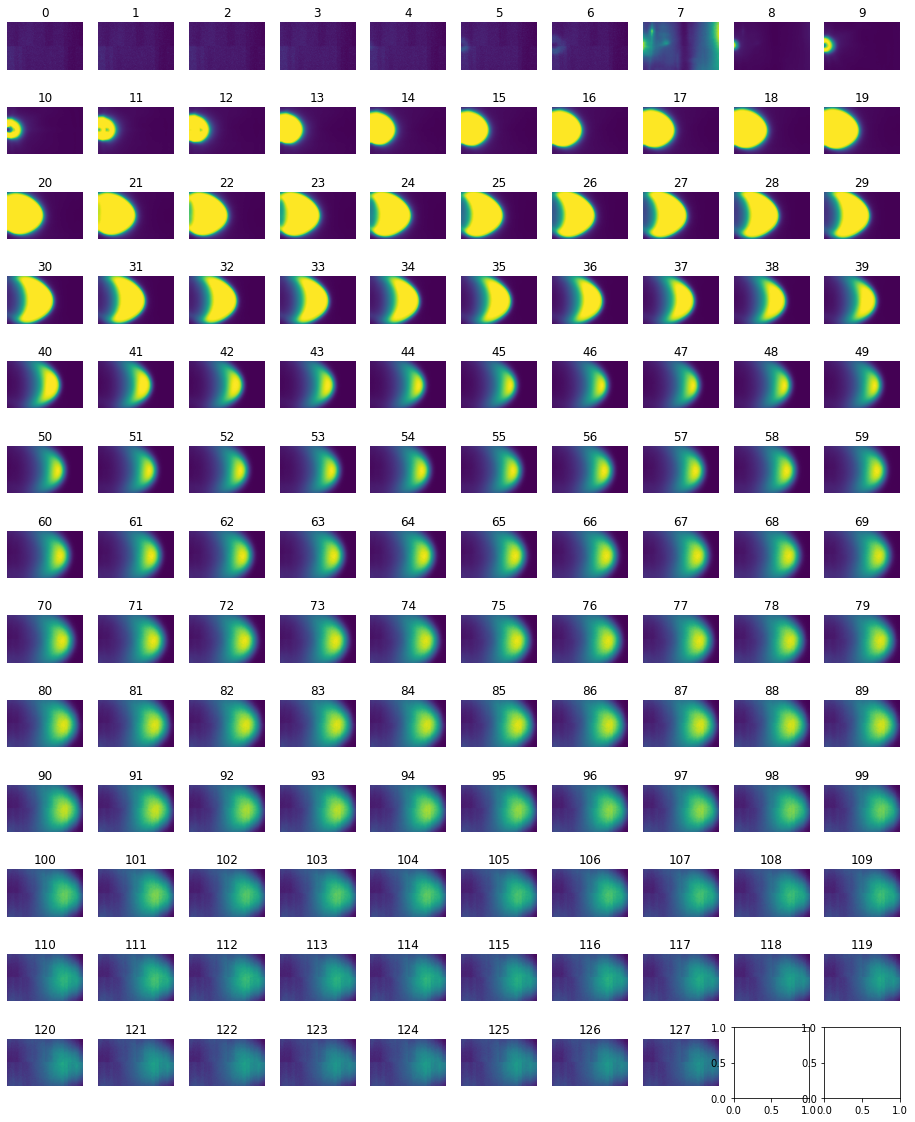

                               condition             metric  growth_index  \
16989  100mj-700c-200mtorr-10hz-growth_1  axis_major_length            22   
32837  100mj-700c-200mtorr-10hz-growth_1         centroid-1            36   
52811  100mj-700c-200mtorr-10hz-growth_1       eccentricity            27   
9365   100mj-700c-200mtorr-10hz-growth_1        area_filled            18   
50111  100mj-700c-200mtorr-10hz-growth_1       eccentricity             6   

       time_step     a.u.  
16989         93      0.0  
32837         69      0.0  
52811         75      0.0  
9365          21  24174.0  
50111         63      0.0  
area


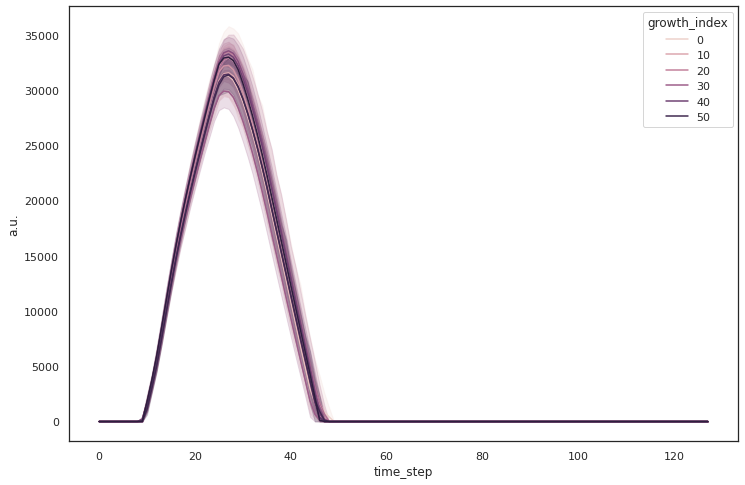

area_filled


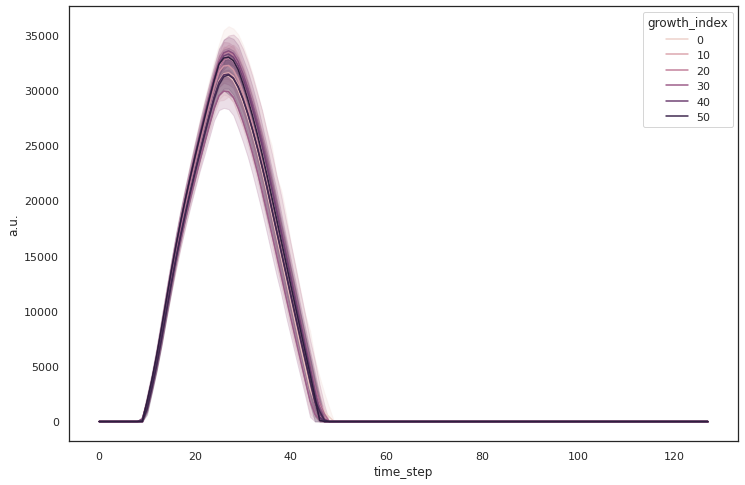

axis_major_length


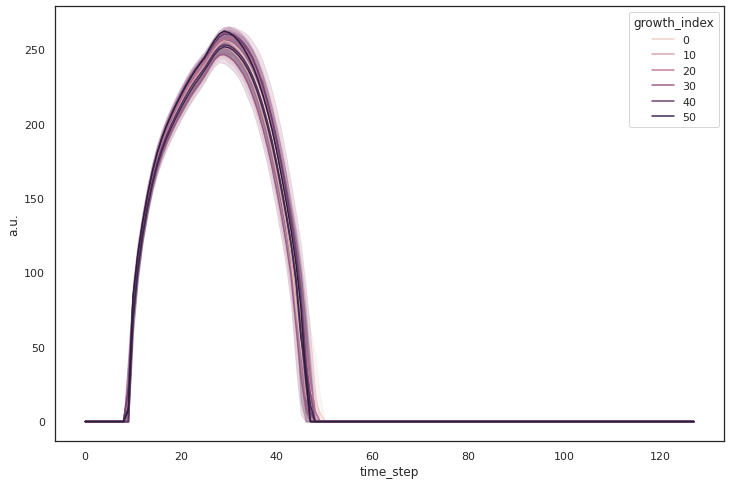

axis_minor_length


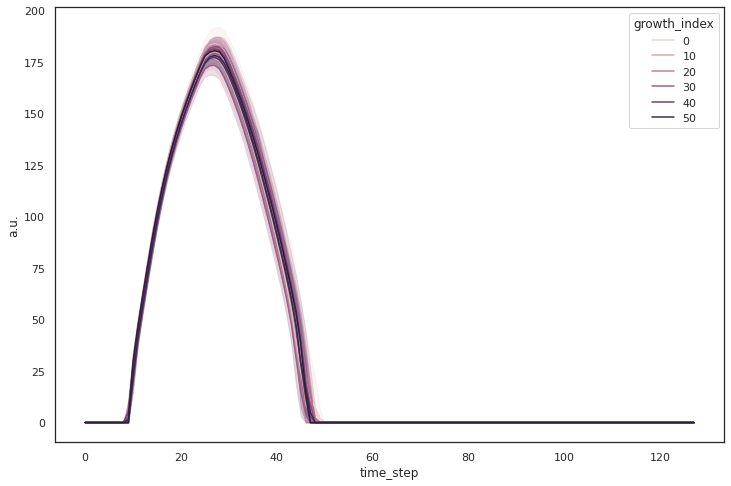

centroid-1


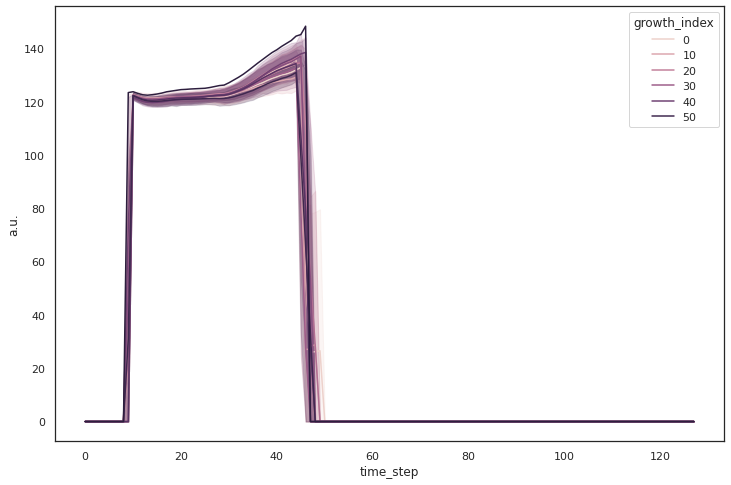

centroid-2


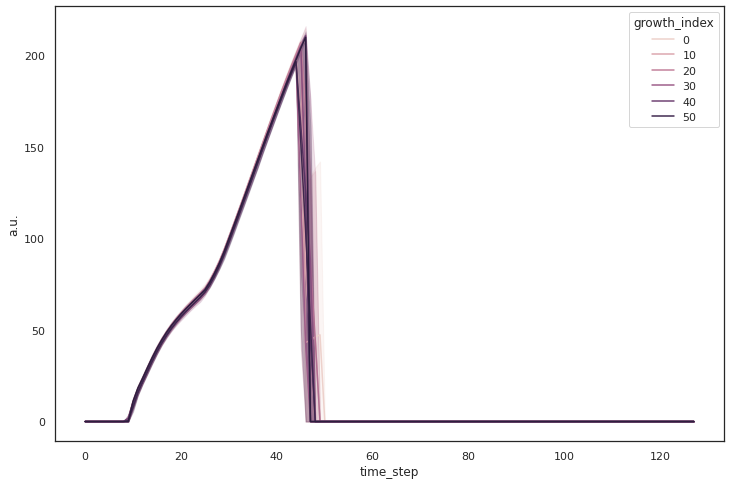

orientation


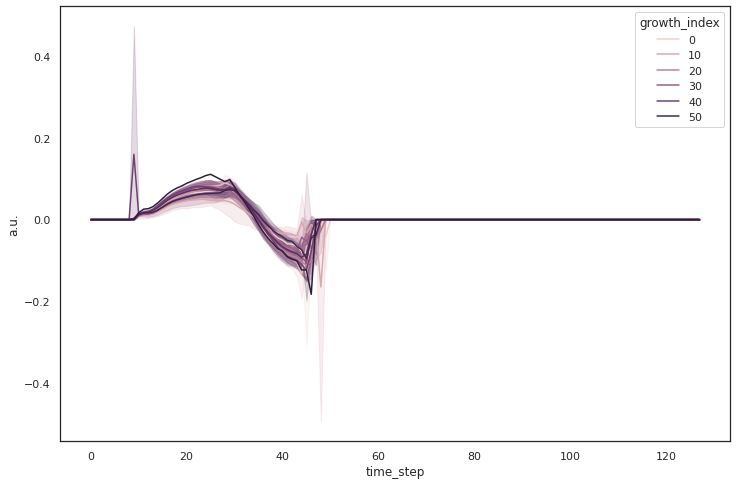

eccentricity


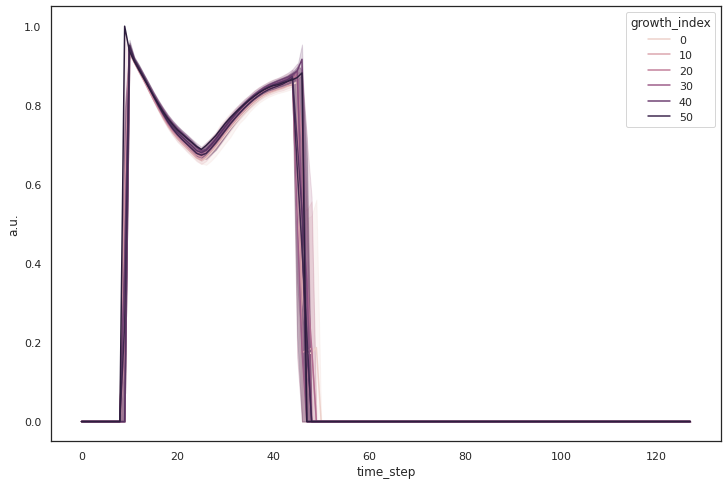

perimeter


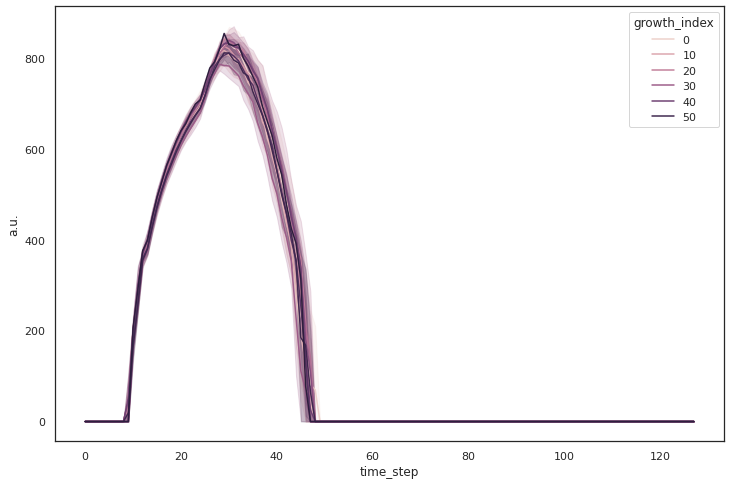

velocity


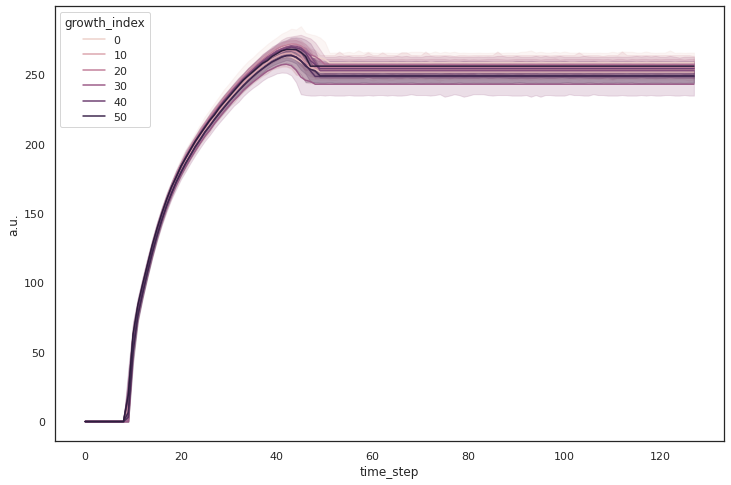

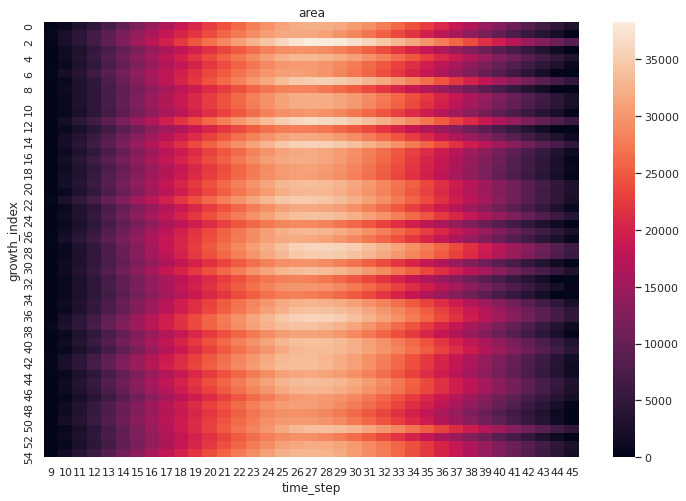

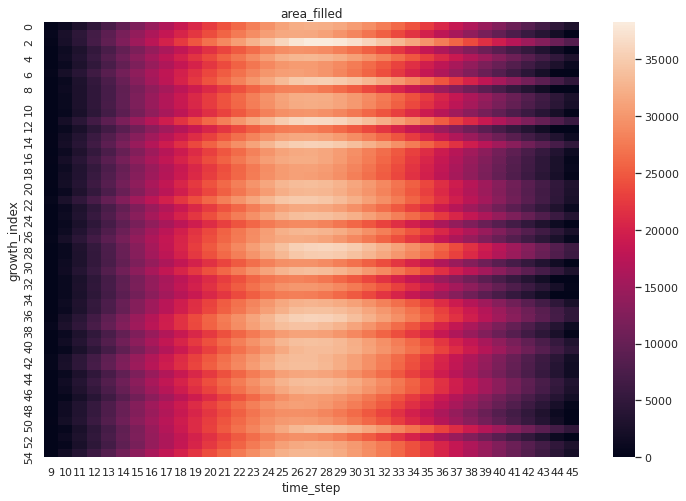

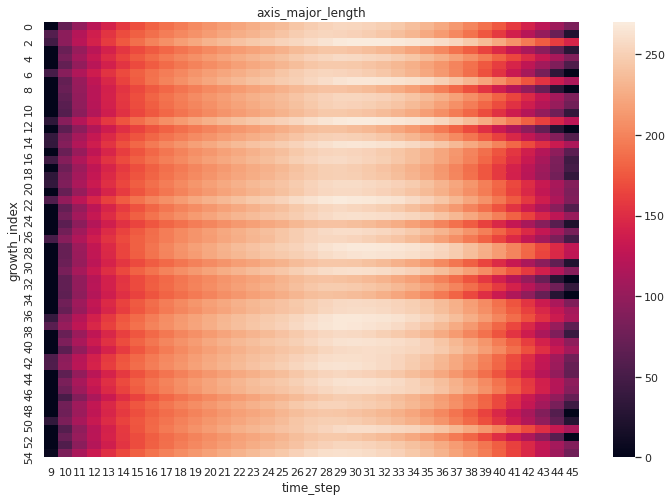

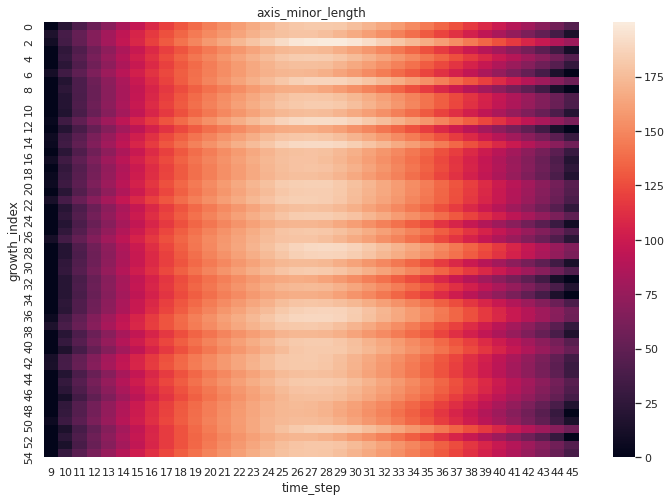

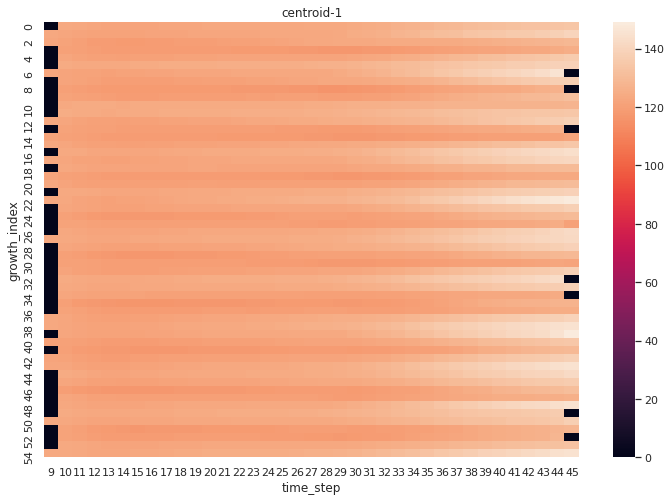

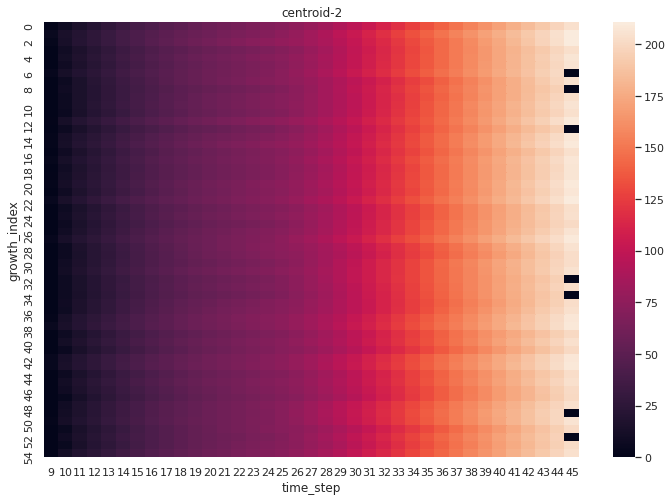

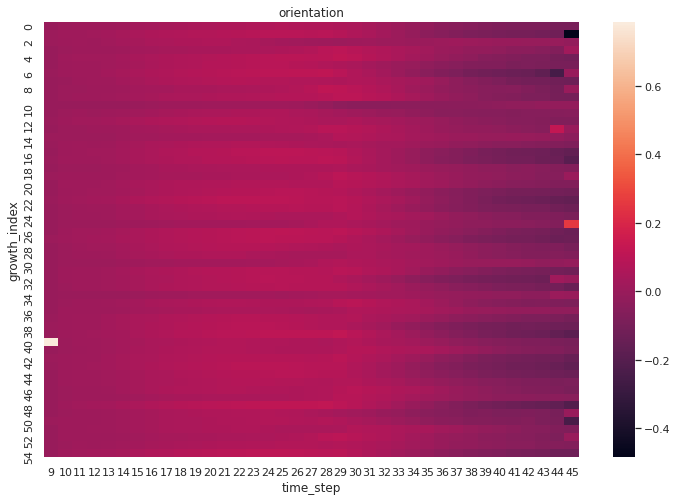

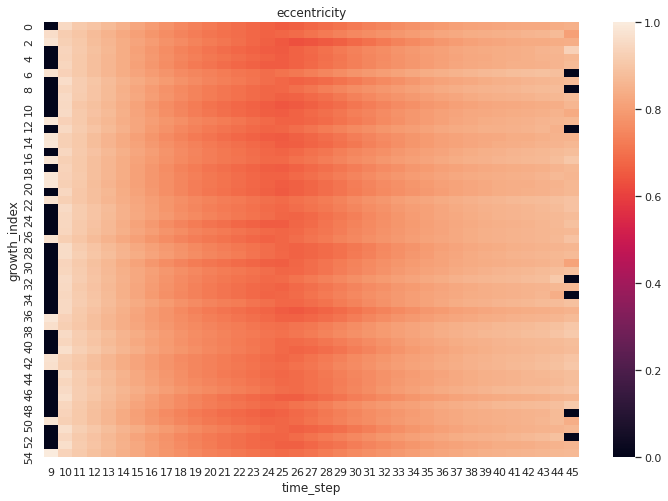

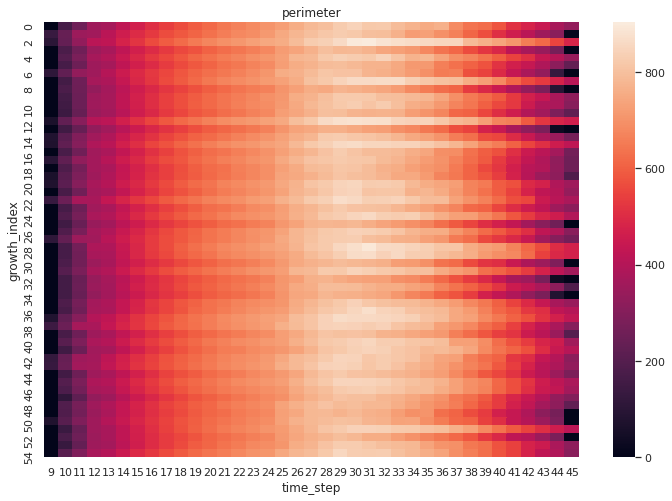

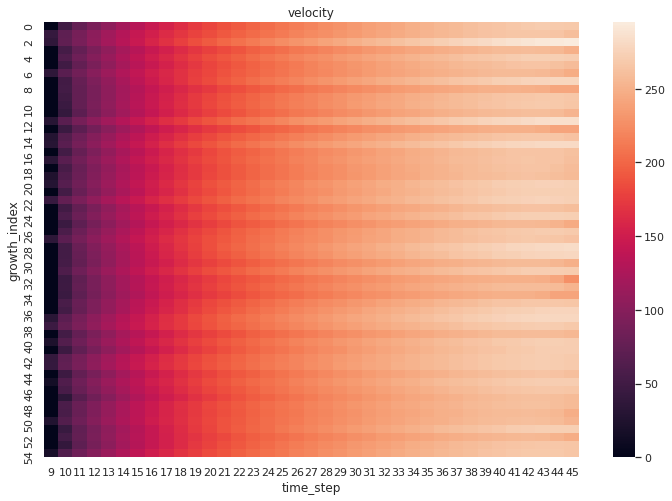

In [7]:
ds_name = '1-SrRuO3'
condition = '100mj-700c-200mtorr-10hz-growth_1'
df_1 = plot_metrics_all_steps(ds_path, class_name, ds_name, condition)

In [8]:
ds_path = '/scratch/yichen/pld_plumes/YG029_Yichen_Guo_06012022.h5'
class_name = 'PLD_Plumes'
show_h5_dataset_name(ds_path, class_name)

<KeysViewHDF5 ['1-SrRuO3', '1-SrRuO3_Pre']>


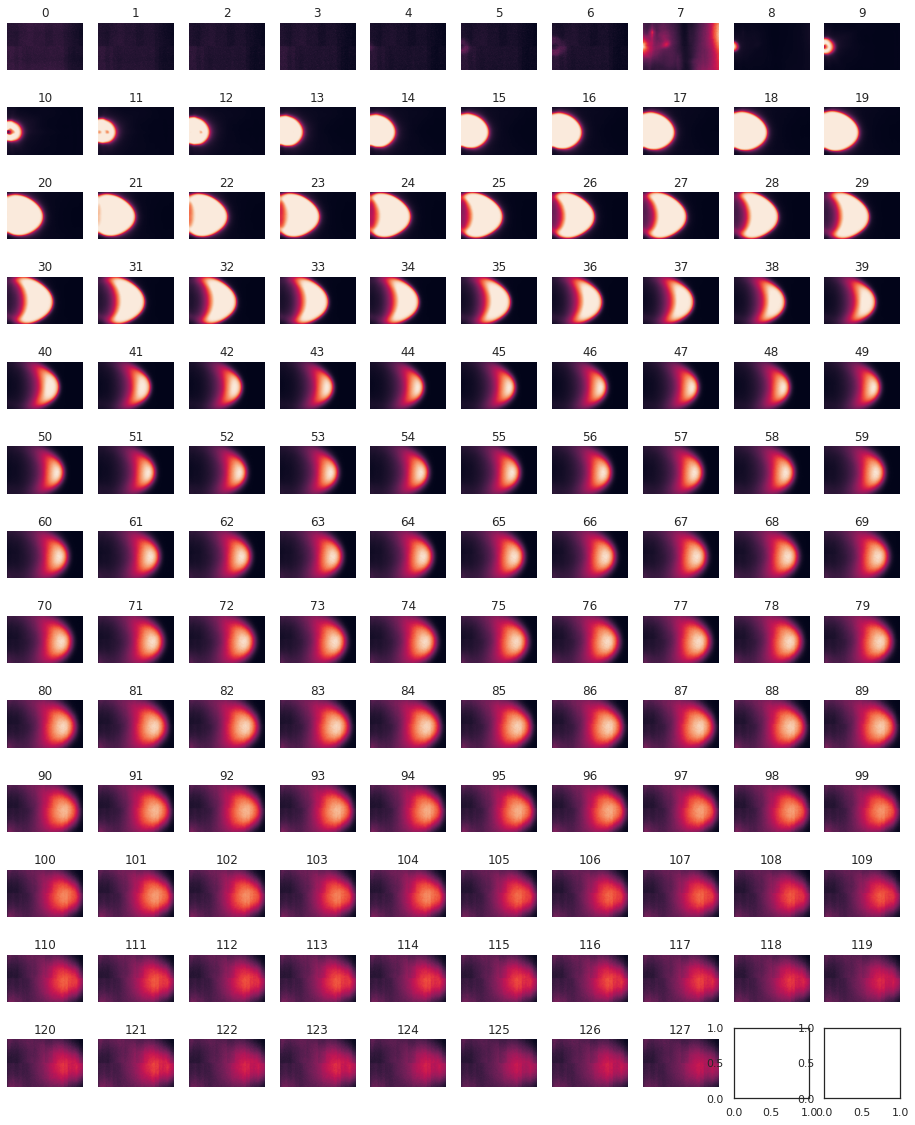

                               condition             metric  growth_index  \
4599   100mj-700c-200mtorr-10hz-growth_2               area            35   
17808  100mj-700c-200mtorr-10hz-growth_2  axis_major_length            29   
34647  100mj-700c-200mtorr-10hz-growth_2         centroid-1            50   
28220  100mj-700c-200mtorr-10hz-growth_2         centroid-1             0   
66413  100mj-700c-200mtorr-10hz-growth_2           velocity            23   

       time_step        a.u.  
4599         119    0.000000  
17808         16  182.192062  
34647         87    0.000000  
28220         60    0.000000  
66413        109  251.000000  
area


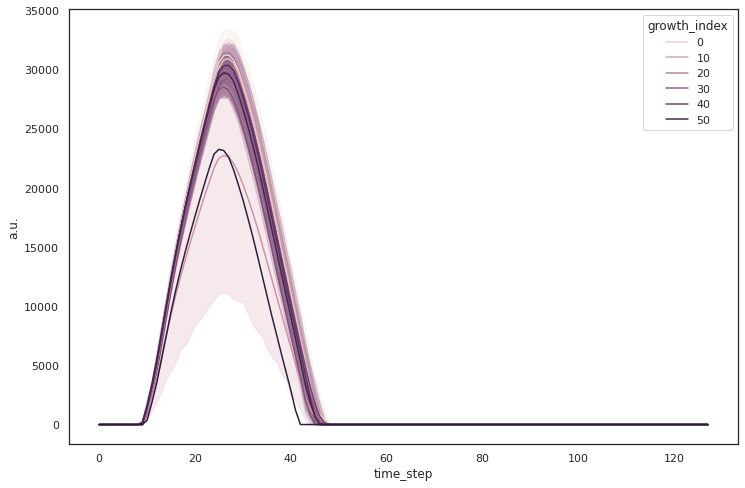

area_filled


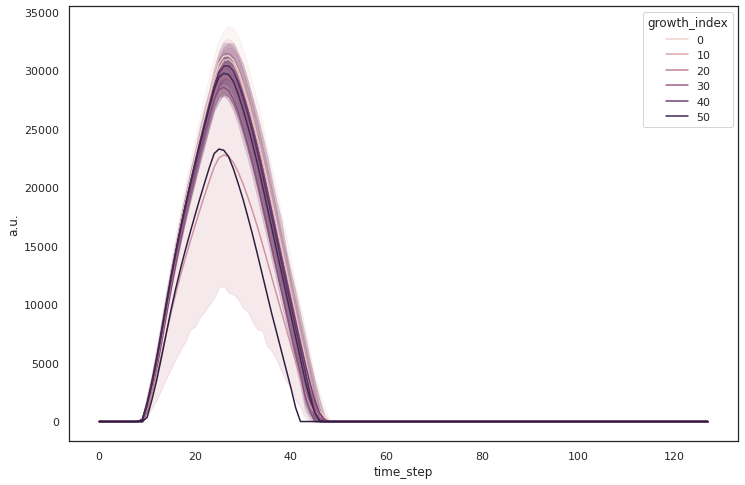

axis_major_length


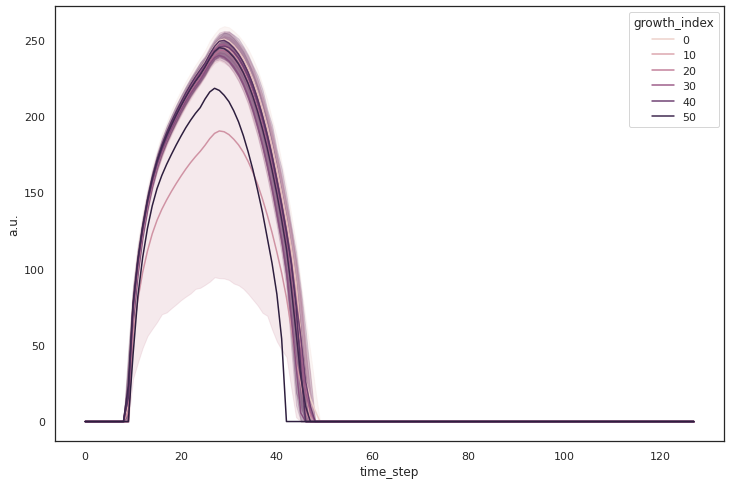

axis_minor_length


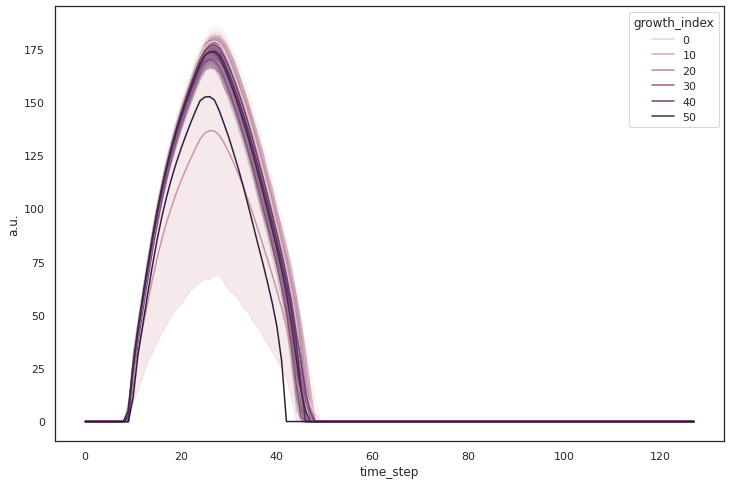

centroid-1


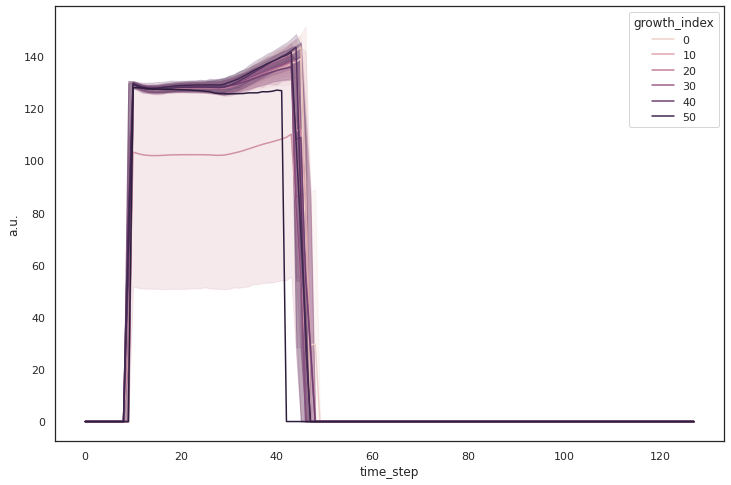

centroid-2


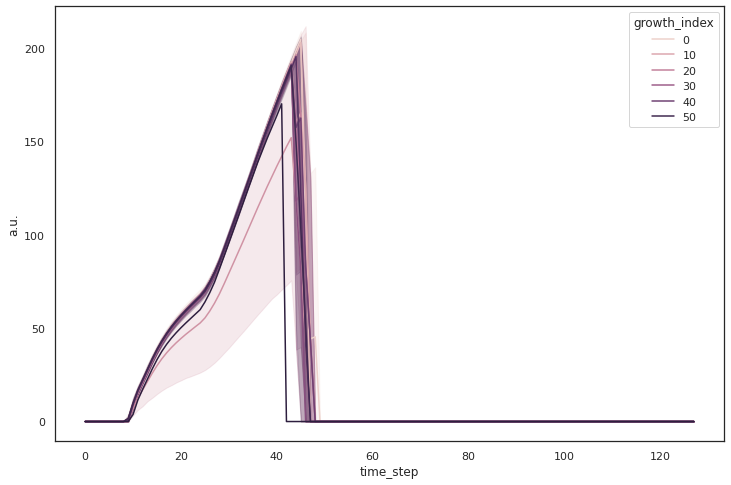

orientation


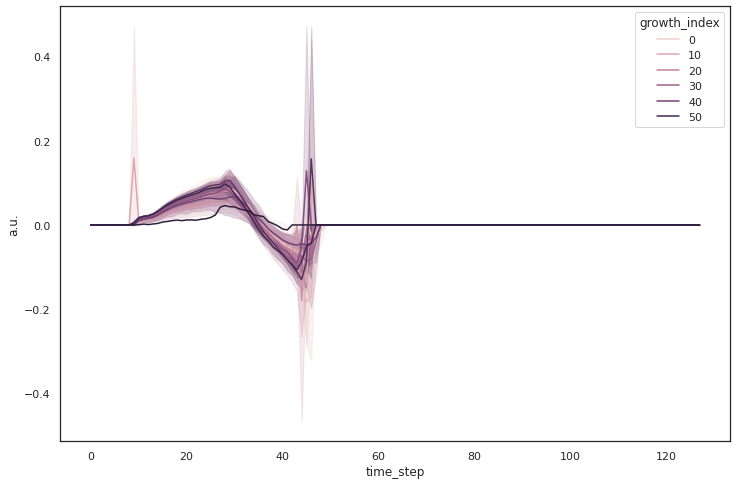

eccentricity


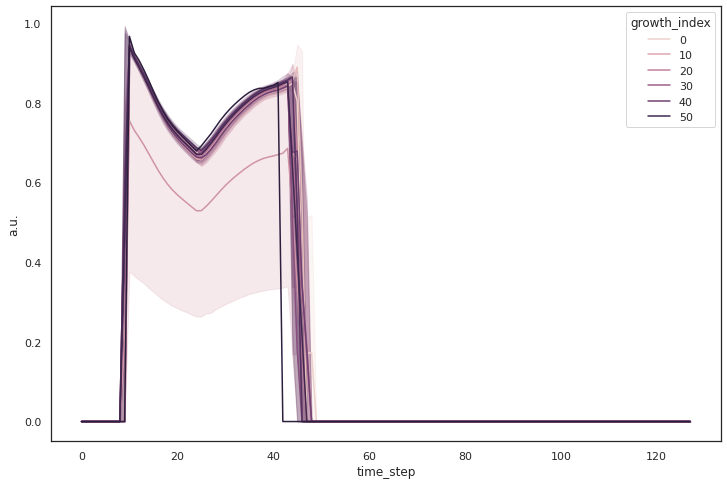

perimeter


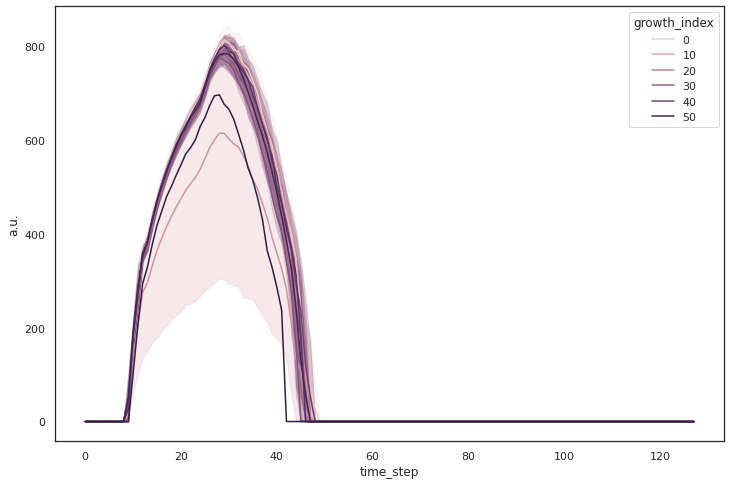

velocity


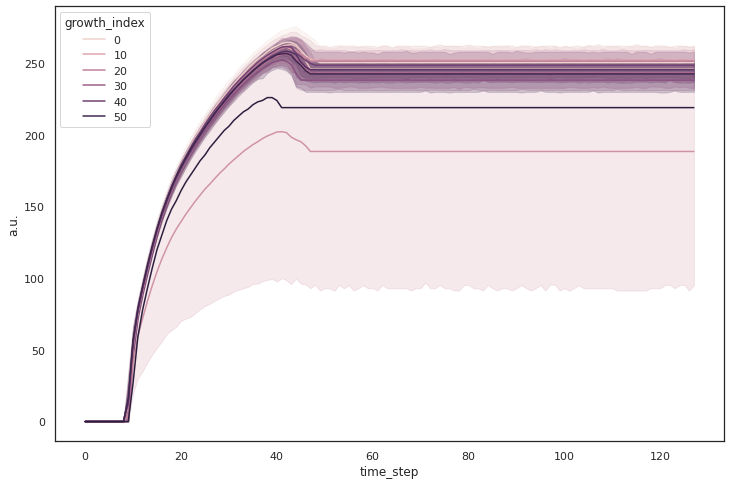

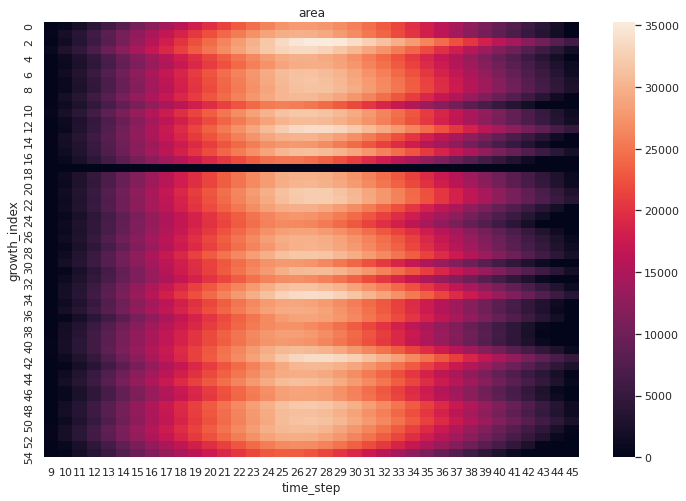

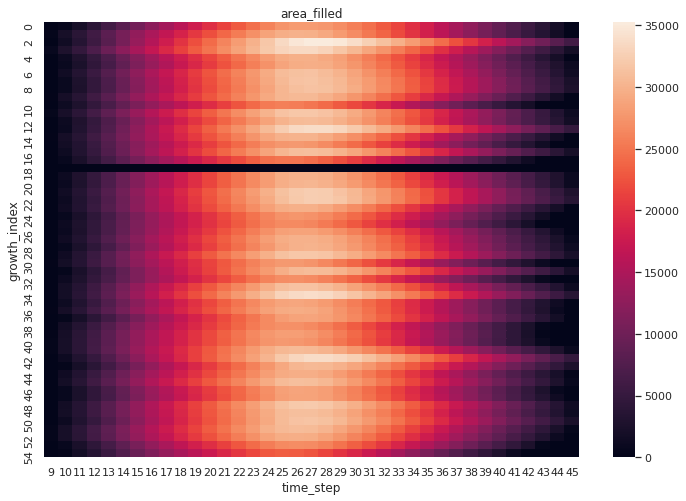

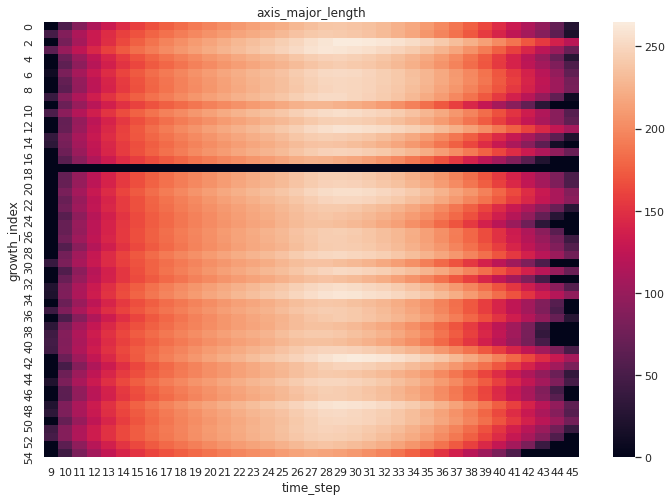

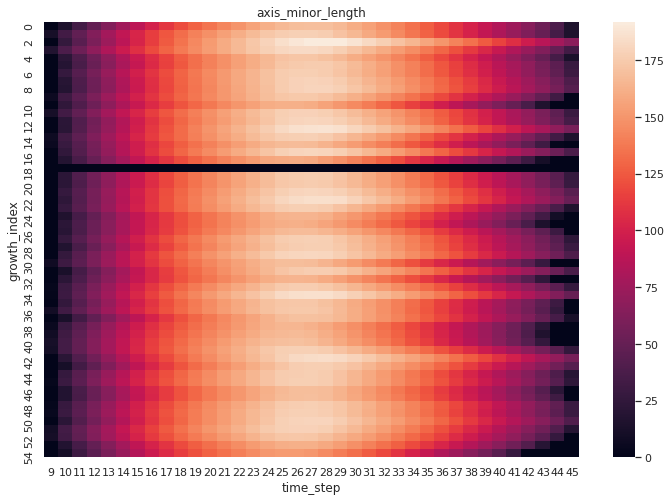

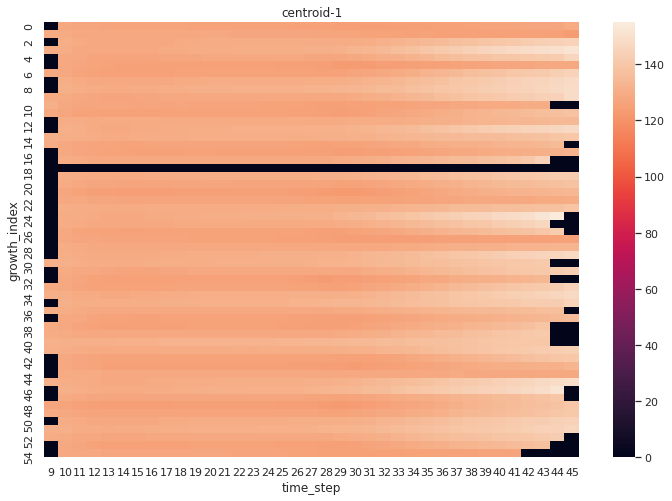

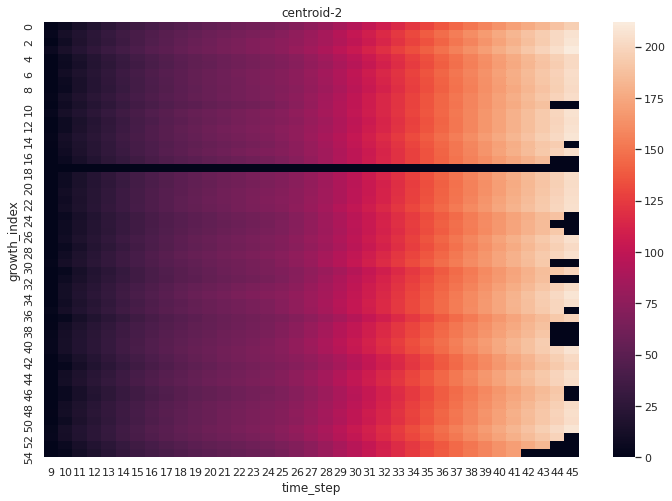

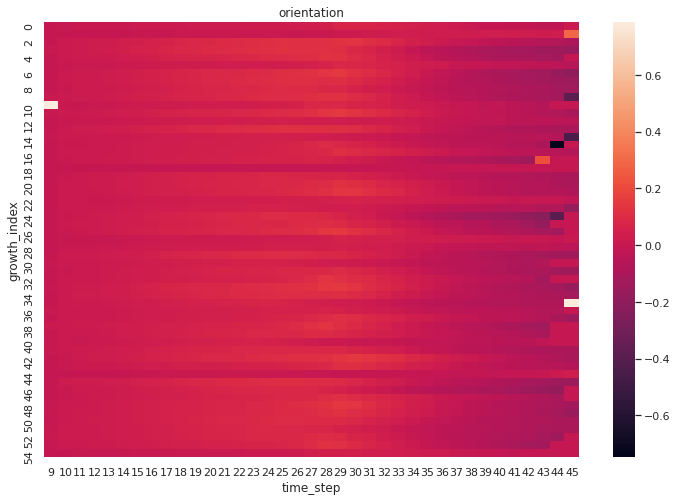

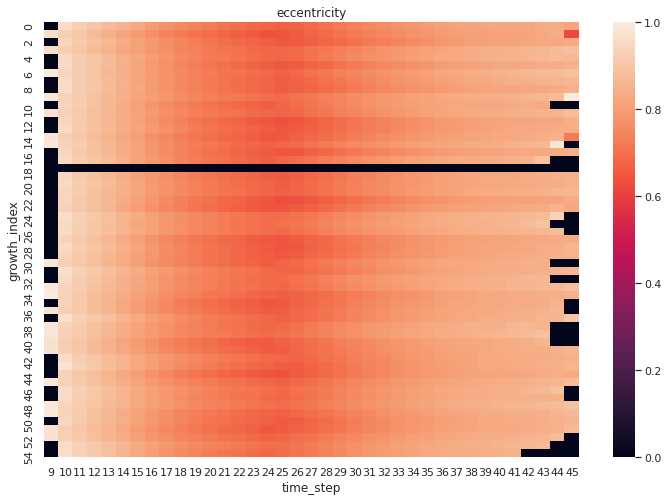

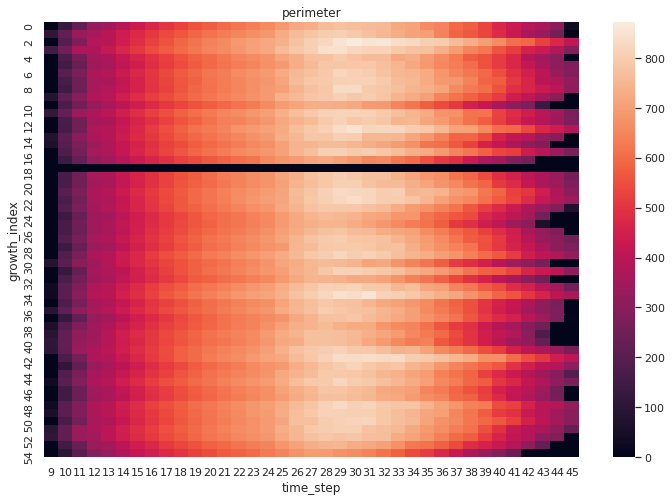

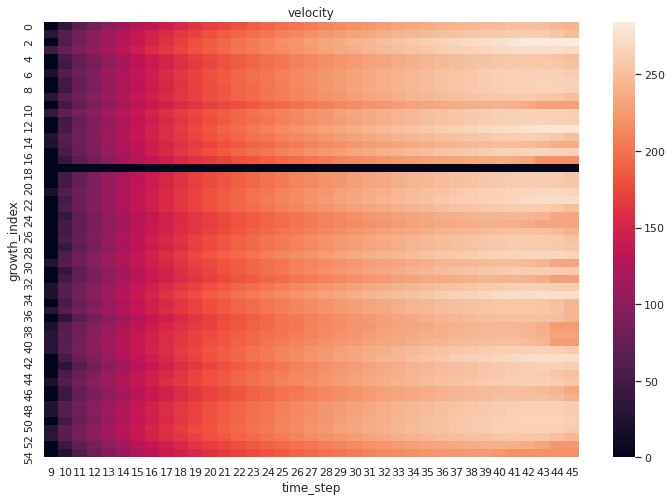

In [9]:
ds_name = '1-SrRuO3'
condition = '100mj-700c-200mtorr-10hz-growth_2'
df_2 = plot_metrics_all_steps(ds_path, class_name, ds_name, condition)

In [10]:
ds_path = '/scratch/yichen/pld_plumes/YG030_Yichen_Guo_06012022.h5'
class_name = 'PLD_Plumes'
show_h5_dataset_name(ds_path, class_name)

<KeysViewHDF5 ['1-SrRuO3', '1-SrRuO3_Pre']>


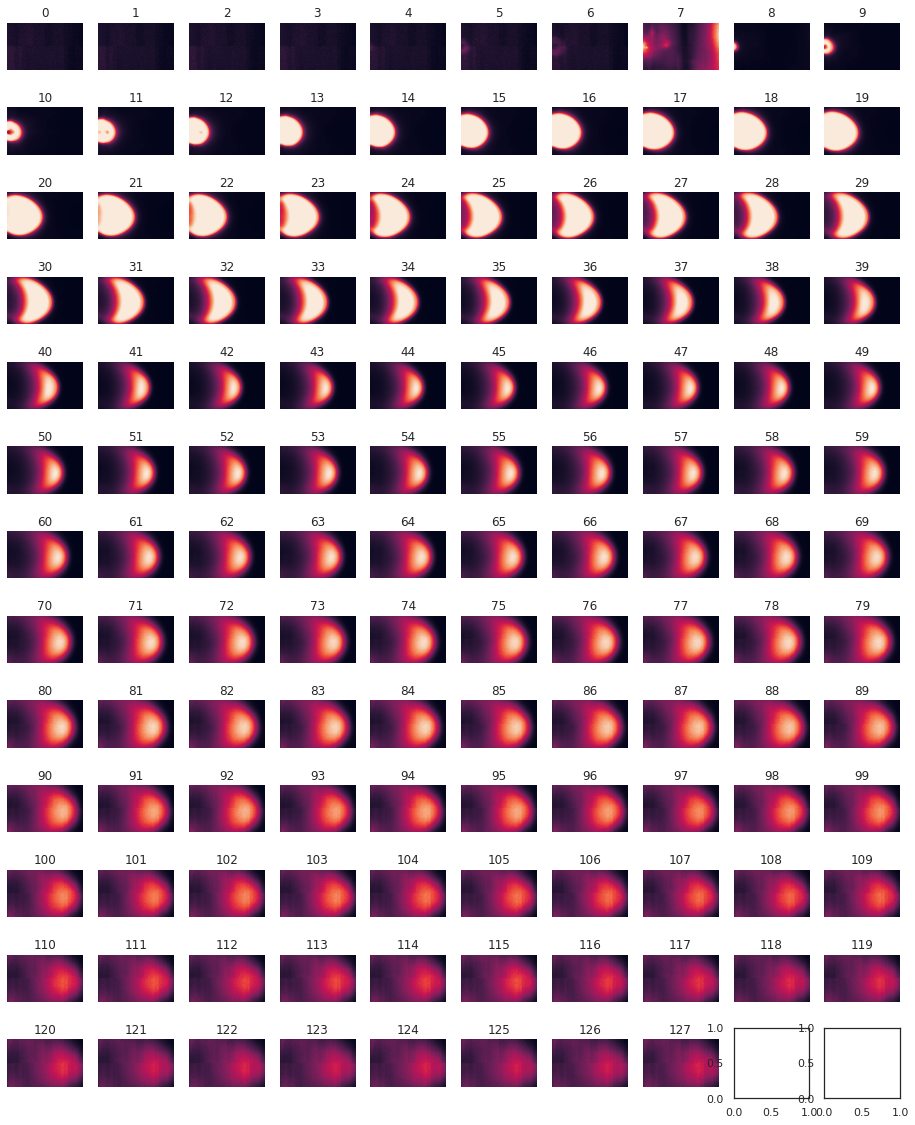

                               condition             metric  growth_index  \
34000  100mj-700c-200mtorr-10hz-growth_3         centroid-1            45   
47937  100mj-700c-200mtorr-10hz-growth_3        orientation            44   
60709  100mj-700c-200mtorr-10hz-growth_3          perimeter            34   
24616  100mj-700c-200mtorr-10hz-growth_3  axis_minor_length            27   
28550  100mj-700c-200mtorr-10hz-growth_3         centroid-1             3   

       time_step        a.u.  
34000         80    0.000000  
47937         65    0.000000  
60709         37  635.423462  
24616         40   86.509674  
28550          6    0.000000  
area


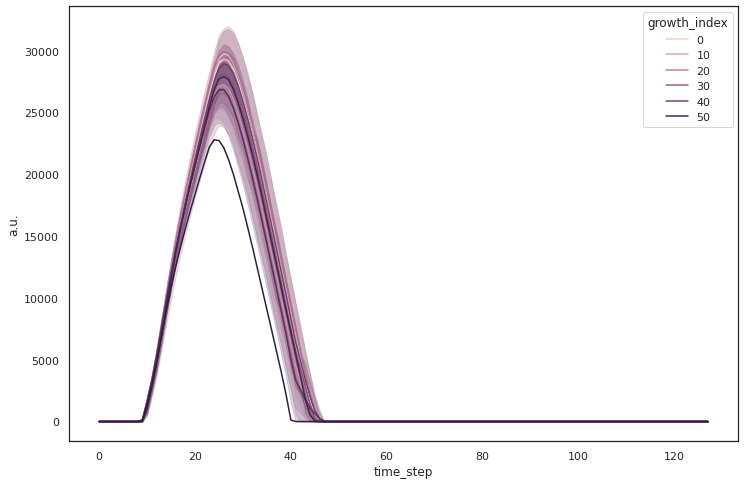

area_filled


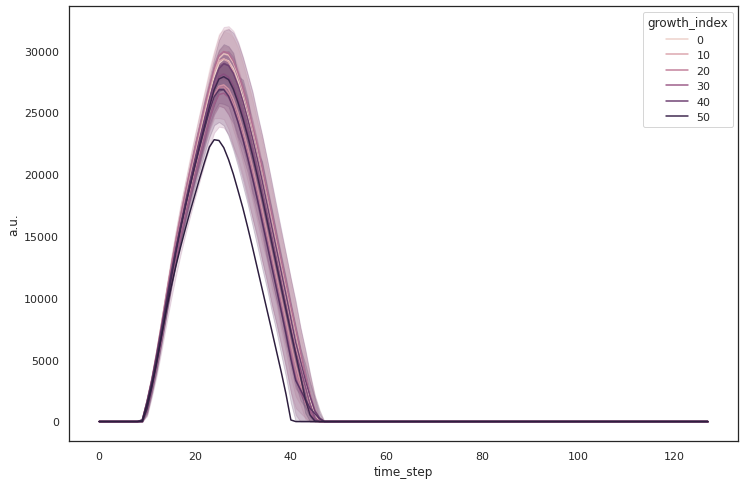

axis_major_length


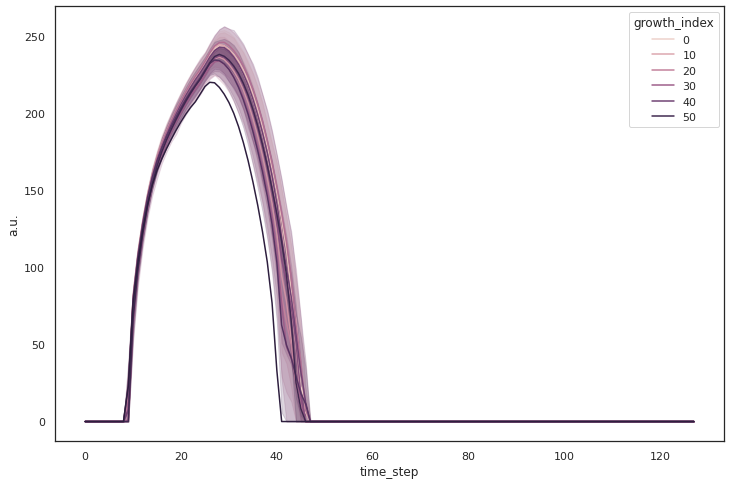

axis_minor_length


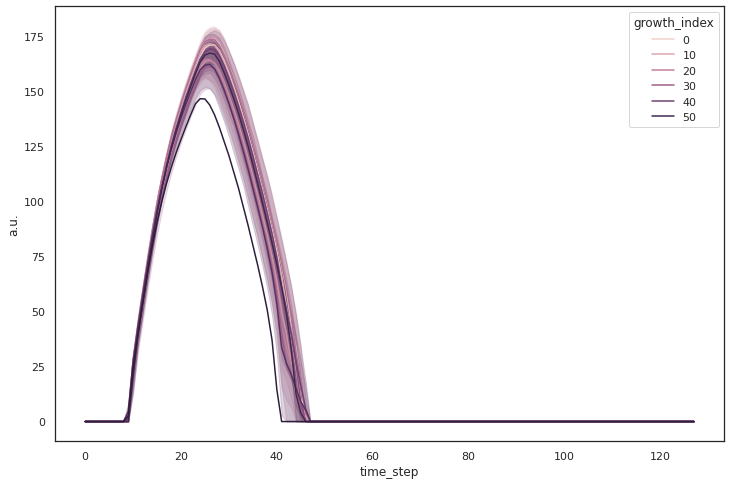

centroid-1


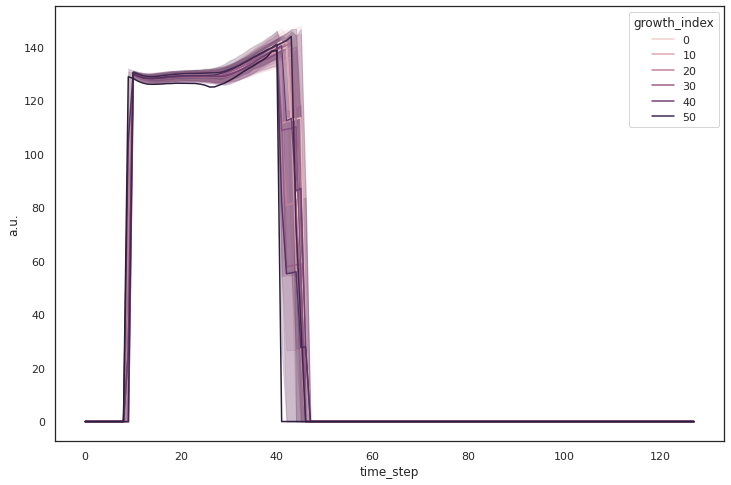

centroid-2


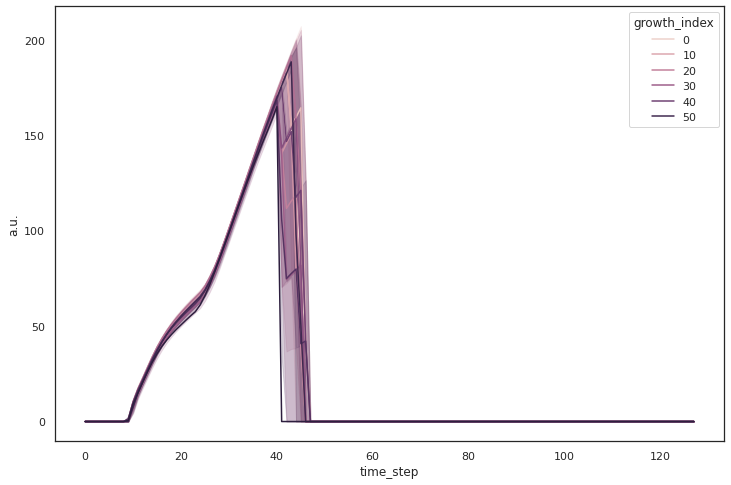

orientation


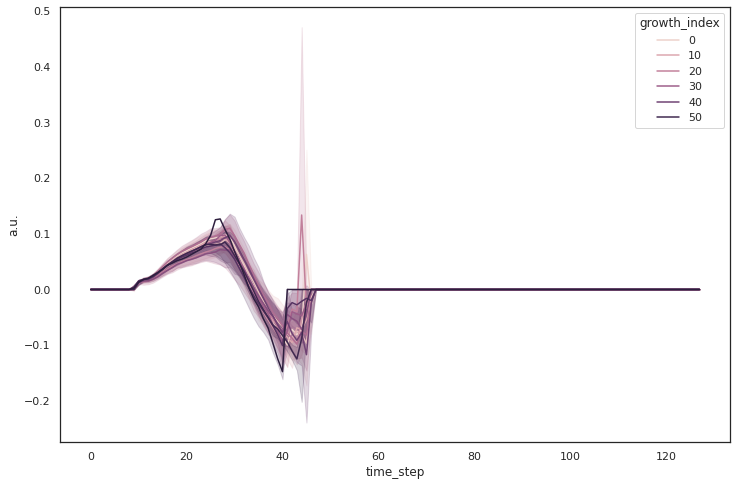

eccentricity


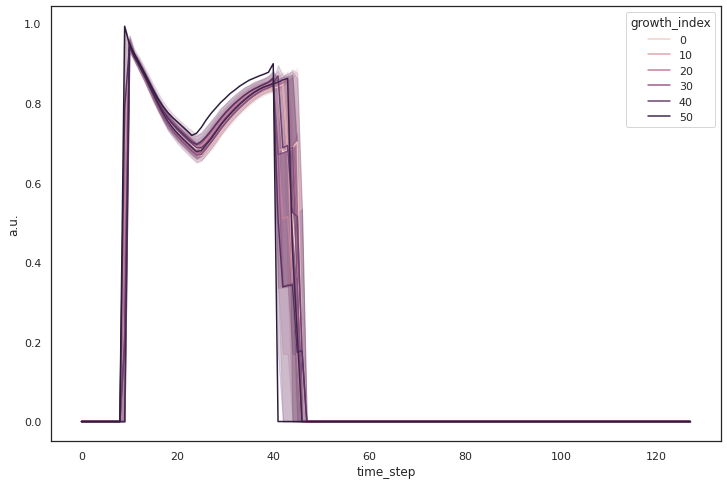

perimeter


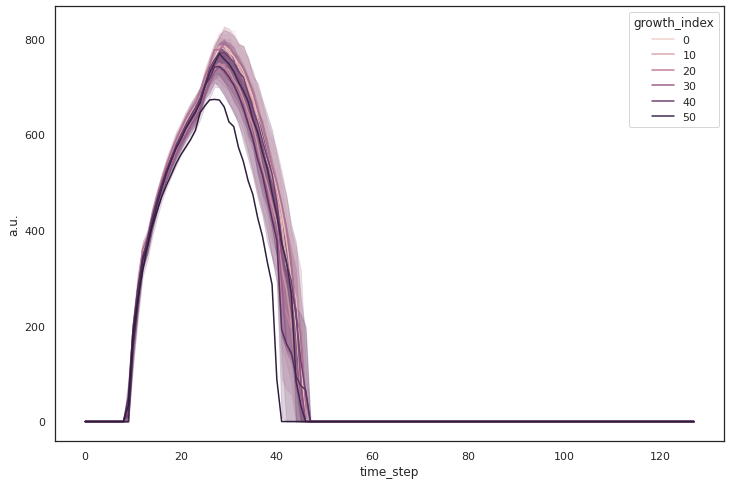

velocity


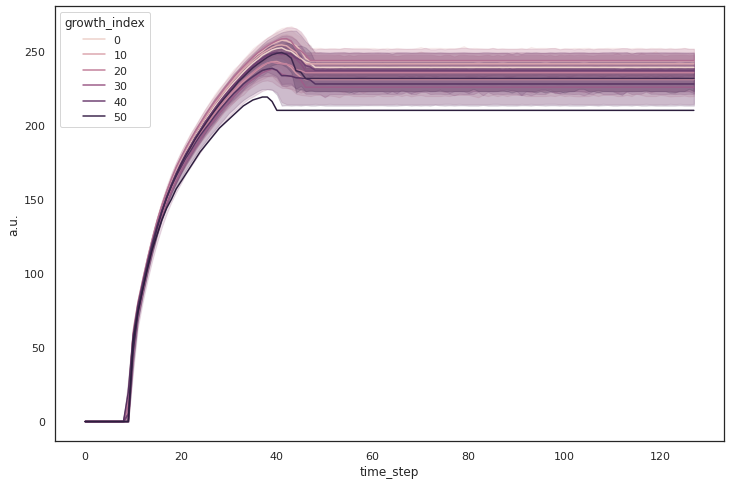

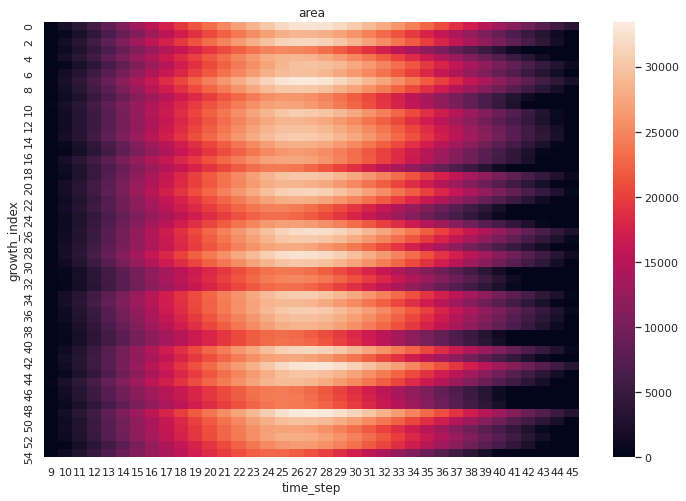

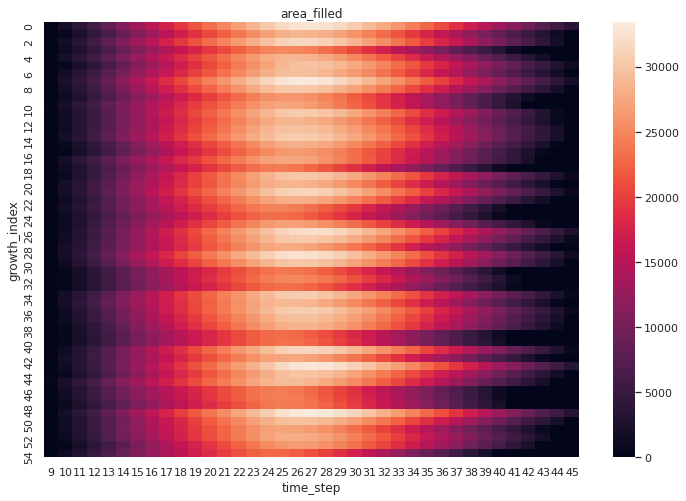

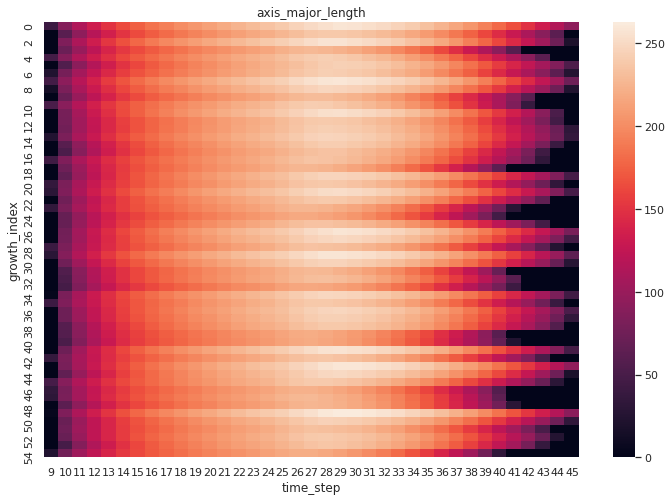

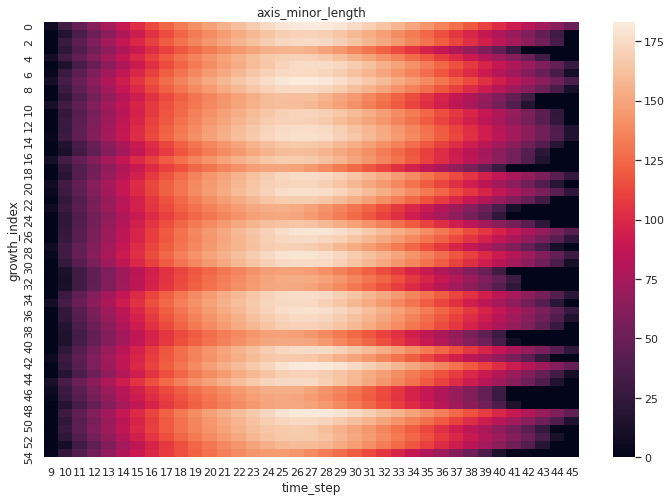

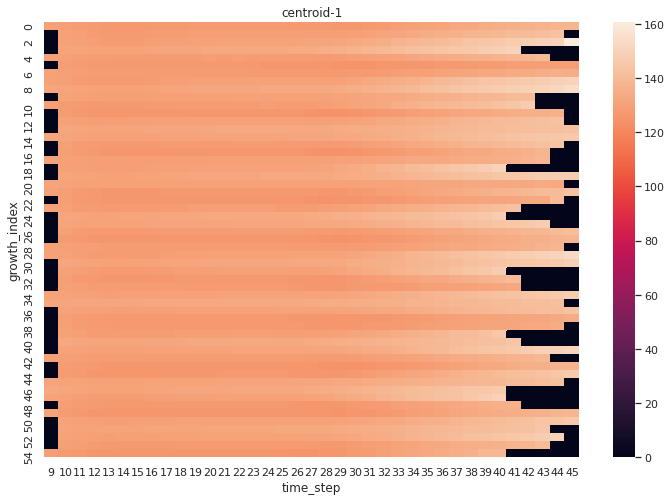

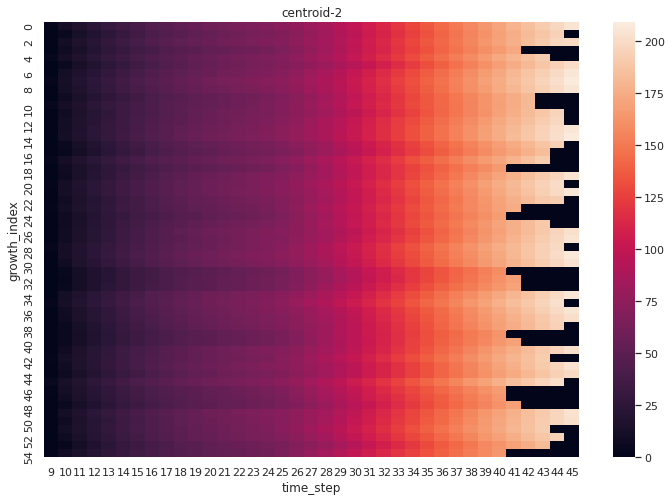

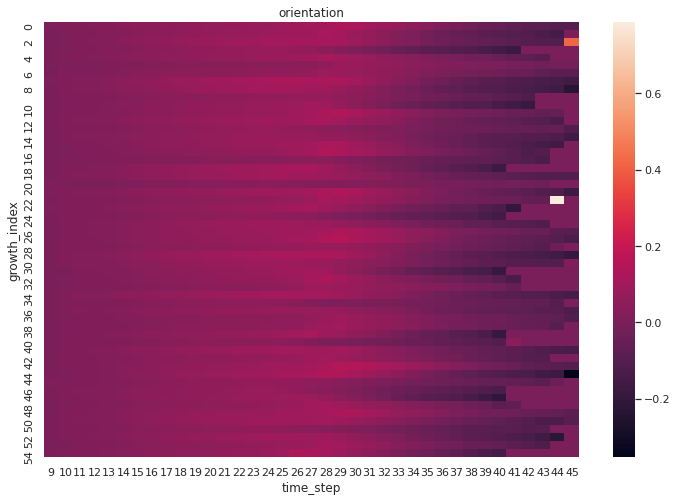

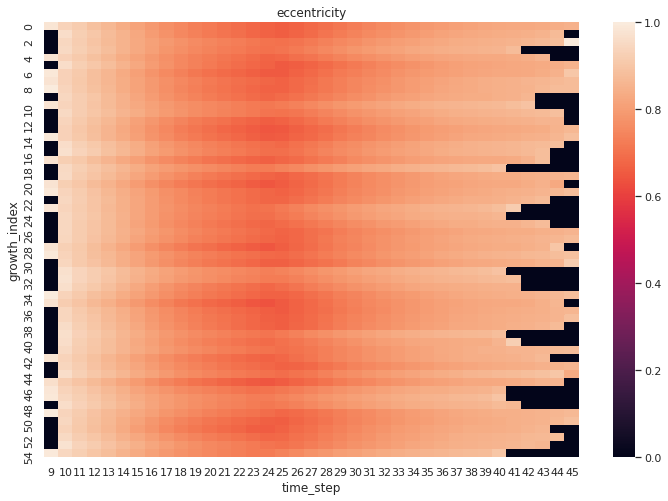

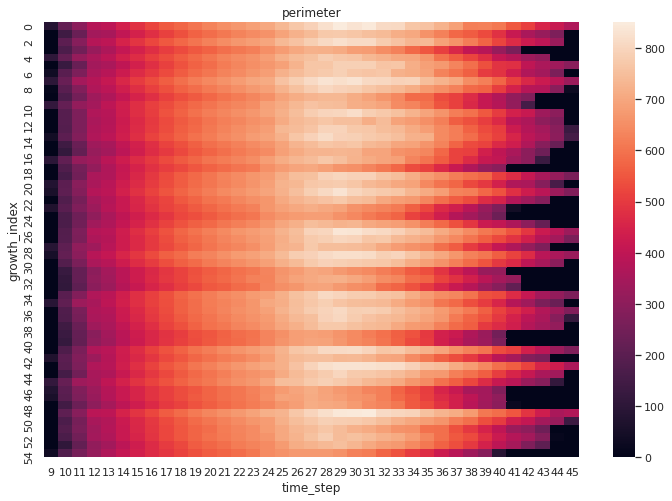

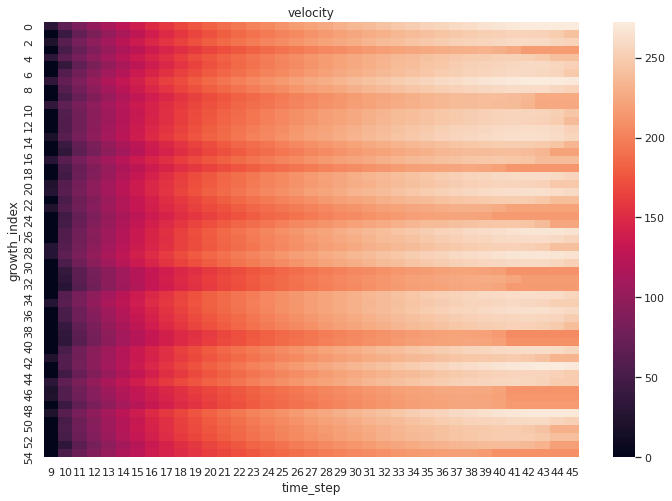

In [11]:
ds_name = '1-SrRuO3'
condition = '100mj-700c-200mtorr-10hz-growth_3'
df_3 = plot_metrics_all_steps(ds_path, class_name, ds_name, condition)

area


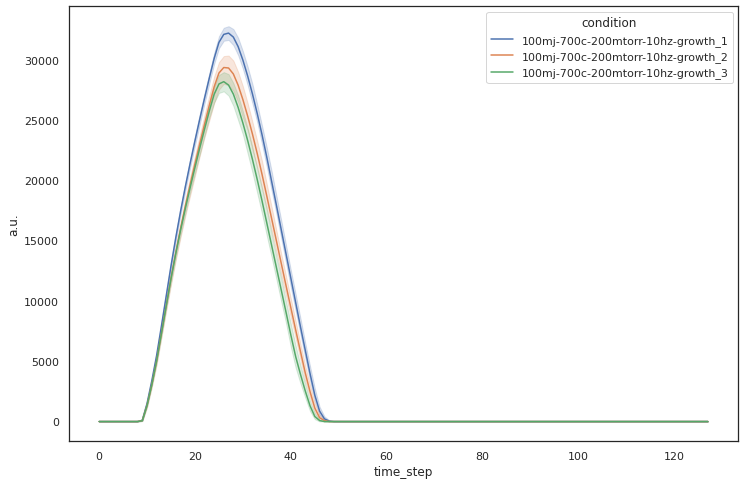

area_filled


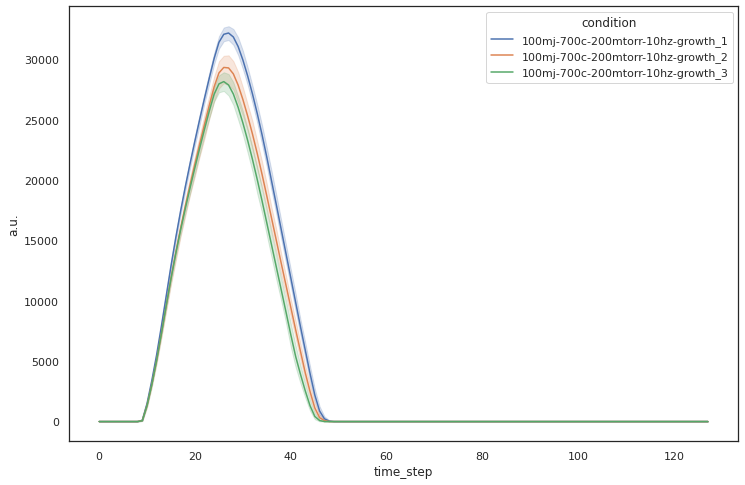

axis_major_length


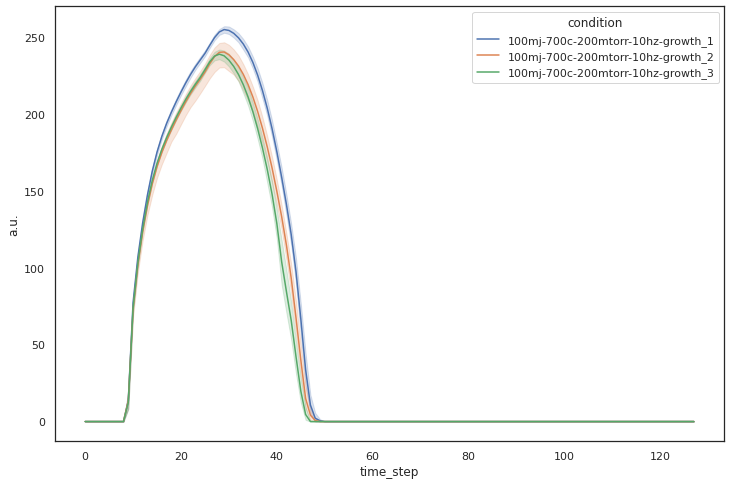

axis_minor_length


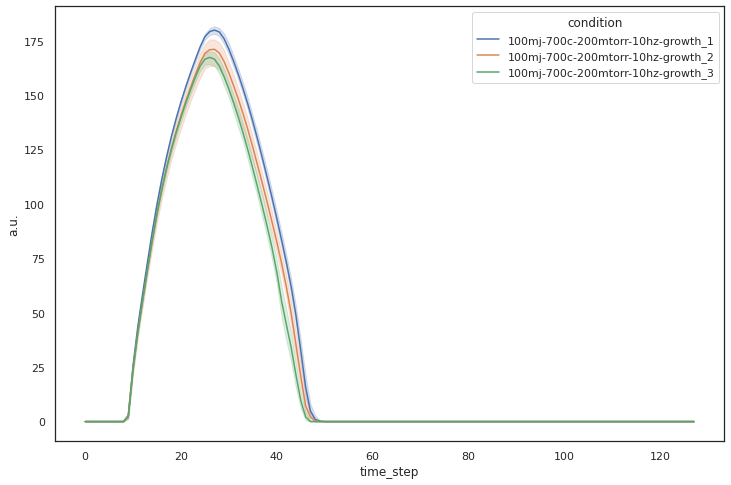

centroid-1


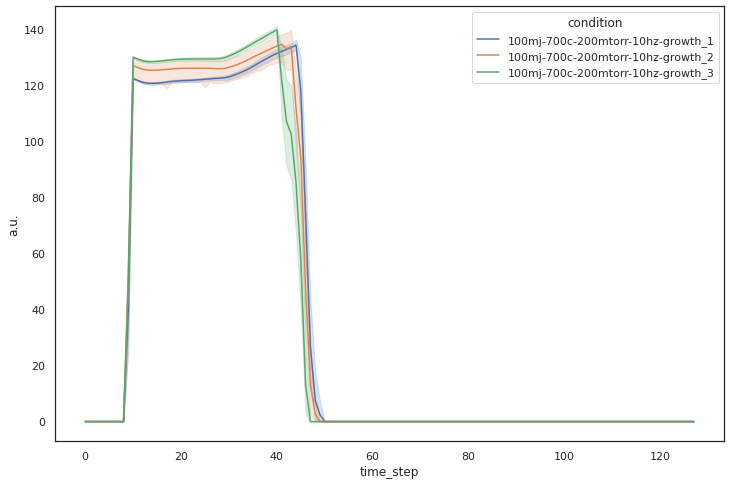

centroid-2


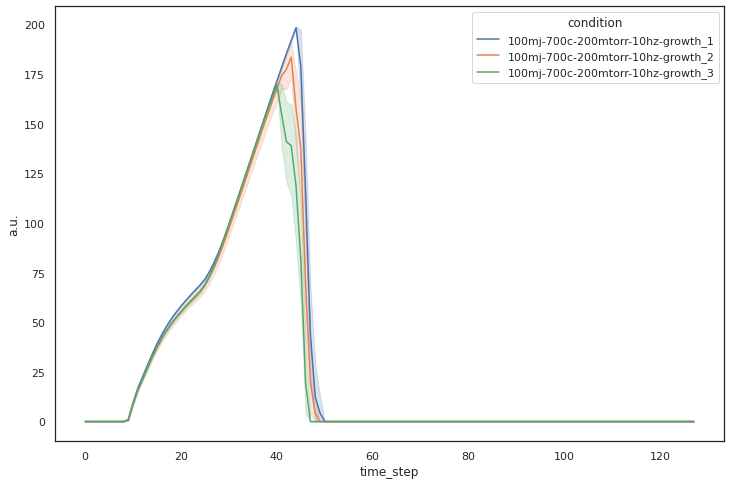

orientation


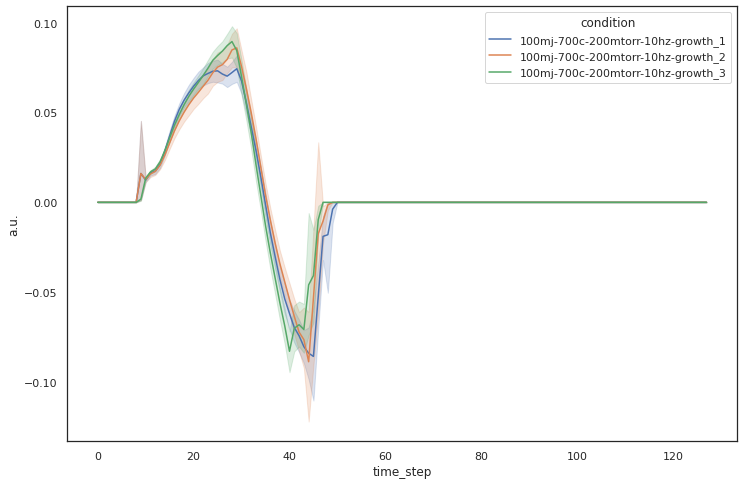

eccentricity


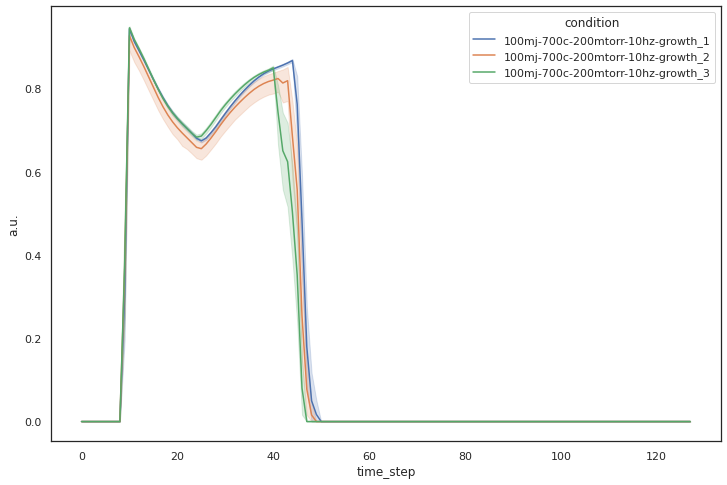

perimeter


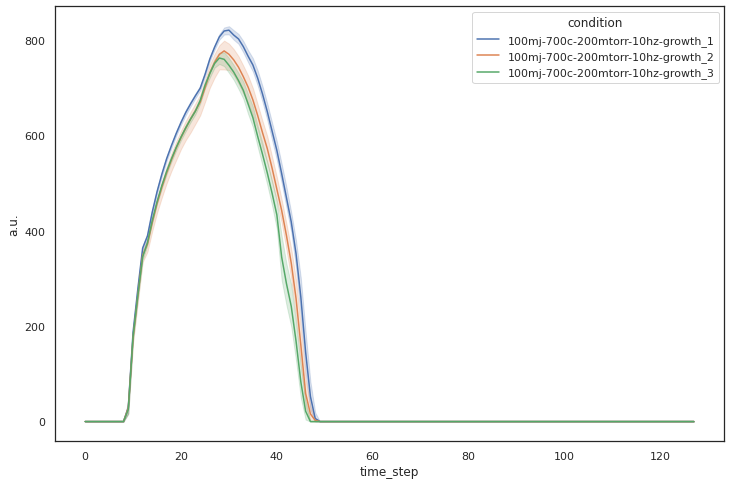

velocity


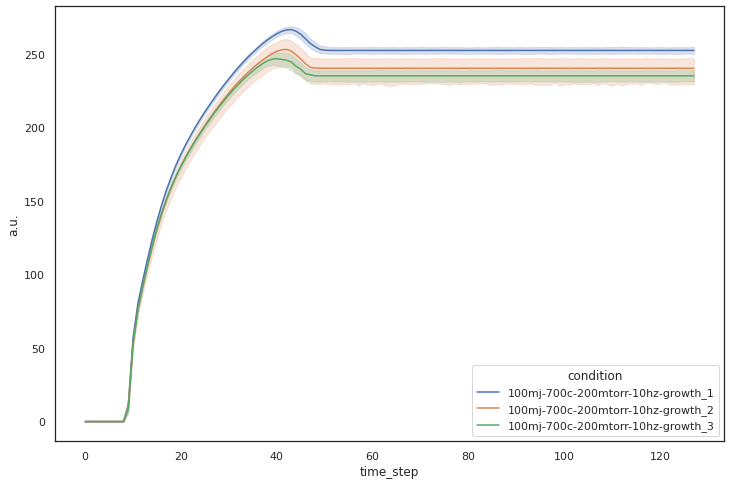

condition    metric  growth_index  time_step  \
0       100mj-700c-200mtorr-10hz-growth_1      area             0          0   
1       100mj-700c-200mtorr-10hz-growth_1      area             0          1   
2       100mj-700c-200mtorr-10hz-growth_1      area             0          2   
3       100mj-700c-200mtorr-10hz-growth_1      area             0          3   
4       100mj-700c-200mtorr-10hz-growth_1      area             0          4   
...                                   ...       ...           ...        ...   
211195  100mj-700c-200mtorr-10hz-growth_3  velocity            54        123   
211196  100mj-700c-200mtorr-10hz-growth_3  velocity            54        124   
211197  100mj-700c-200mtorr-10hz-growth_3  velocity            54        125   
211198  100mj-700c-200mtorr-10hz-growth_3  velocity            54        126   
211199  100mj-700c-200mtorr-10hz-growth_3  velocity            54        127   

         a.u.  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
211195  210.0  
211196  210.0  
211197  210.0  
211198  210.0  
211199  210.0  

[211200 rows x 5 columns]

In [12]:
df_all = pd.concat([df_1, df_2, df_3], ignore_index=True)
plot_metrics(df_all, sort_by='condition')

# upload notebook to dataset

In [15]:
file_name = %pwd


In [5]:
import ipyparams


ModuleNotFoundError: No module named 'ipyparams'

In [4]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

FileNotFoundError: Can't identify the notebook name.

In [17]:
os.getcwd()

'/scratch/yichen/notebooks/PLD_Workflow'

In [2]:
ipynbname.name()

FileNotFoundError: Can't identify the notebook name.

In [3]:
ipynbname.path()

FileNotFoundError: Can't identify the notebook path.

In [1]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

nb_fname, nb_path

FileNotFoundError: Can't identify the notebook name.

In [16]:
file_name

'/scratch/yichen/notebooks/PLD_Workflow'

In [14]:
%pwd

'/scratch/yichen/notebooks/PLD_Workflow'

In [13]:
import pandas as pd
import json # For dealing with metadata
import os # For file level operations
from datafed.CommandLib import API

df_api = API()

file_name = "06012022-plume_YG028-30.ipynb"
dc_resp = df_api.dataCreate(file_name,
                            parent_id='c/398047791', # parent collection
                           )

NameError: name 'file_name' is not defined

In [ ]:
rec_id = dc_resp[0].data[0].id
put_resp = df_api.dataPut(rec_id, # record id
                          '/scratch/yichen/notebooks/PLD_Workflow/06012022-plume_YG028-30.ipynb', # path to file
                          wait=True  # Waitcas until transfer completes.
                          )
out = put_resp